# Задание

Лабораторная работа №2: Случайные величины. Нормальный закон распределения. Моменты и критические границы случайной величины
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic   непрерывное распределение случайной величины, которое было бы близко к нормальному.
Построить графики распределения.
2.	Посчитать в распределение близком к нормальному  1 л.р. и найденном непрерывном распределении:
•	мат.ожидание (*)
•	2 (дисперсию) (**), 3 (асимметрию), 4 (эксцесс) моменты 
•	квантили уровня 0,05 и 0,95; 2,5%-ную точку  для найденной случайной величины. 
3.	Построить сравнительную диаграмму найденного распределения и распределения по нормальному закону с параметрами (*, **).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


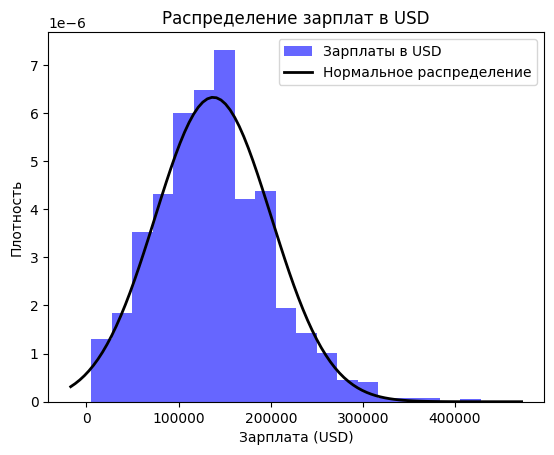

In [3]:
salaries = df['salary_in_usd'].dropna()

plt.hist(salaries, bins=20, density=True, alpha=0.6, color="b", label="Зарплаты в USD")

mu_2, std_2 = salaries.mean(), salaries.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_2, std_2)

plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")

plt.title("Распределение зарплат в USD")
plt.xlabel("Зарплата (USD)")
plt.ylabel("Плотность")
plt.legend()
plt.show()

In [4]:
mean_value_2 = df['salary_in_usd'].mean()
print(f"Математическое ожидание: {mean_value_2:.3f} USD")

variance_2 = df['salary_in_usd'].var()
print(f"Дисперсия: {variance_2:.3f} USD²")

skewness_2 = df['salary_in_usd'].skew()
print(f"Асимметрия: {skewness_2:.3f}")

kurtosis_2 = df['salary_in_usd'].kurtosis()
print(f"Эксцесс: {kurtosis_2:.3f}")

quantile_05_2 = df['salary_in_usd'].quantile(0.05)
quantile_95_2 = df['salary_in_usd'].quantile(0.95)
print(f"Квантиль 0,05: {quantile_05_2:.3f} USD")
print(f"Квантиль 0,95: {quantile_95_2:.3f} USD")

quantile_025_2 = df['salary_in_usd'].quantile(0.025)
print(f"2,5%-ная точка: {quantile_025_2:.3f} USD")


Математическое ожидание: 137570.390 USD
Дисперсия: 3976011879.228 USD²
Асимметрия: 0.536
Эксцесс: 0.834
Квантиль 0,05: 40143.700 USD
Квантиль 0,95: 249360.000 USD
2,5%-ная точка: 24000.000 USD


- Математическое ожидание (Среднее значение): Средняя зарплата составляет 137570.390 USD.
- Дисперсия: Высокая дисперсия — 3976011879.228 USD² — указывает на значительное разброс значений зарплат, что характерно для данных о зарплатах, где может быть большое различие между низкими и высокими зарплатами.
- Асимметрия: Значение 0.536 показывает положительную асимметрию, то есть правый хвост распределения длиннее, что свидетельствует о наличии высоких зарплат (длинный хвост справа).
- Эксцесс: Значение 0.834 указывает на умеренную концентрацию данных вокруг среднего, чуть выше нормы для нормального распределения.
- Квантили:
  - Квантиль 0,05: 40143.700 USD — 5% зарплат ниже этого значения.
  - Квантиль 0,95: 249360.000 USD — 95% зарплат ниже этого значения.
- 2,5%-ная точка: 24000.000 USD — 2,5% зарплат ниже этого уровня.

https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2017.csv

In [5]:
df_rep = pd.read_csv('2017.csv')
df_rep.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


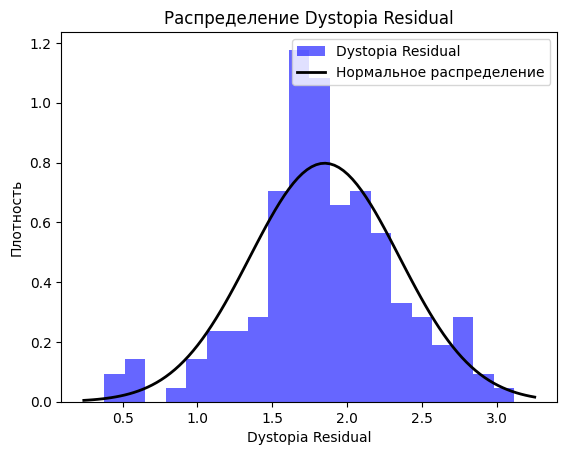

In [6]:
dystopia_residual = df_rep['Dystopia.Residual'].dropna()

plt.hist(dystopia_residual, bins=20, density=True, alpha=0.6, color="b", label="Dystopia Residual")

mu_2, std_2 = dystopia_residual.mean(), dystopia_residual.std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_2, std_2)

plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")

plt.title("Распределение Dystopia Residual")
plt.xlabel("Dystopia Residual")
plt.ylabel("Плотность")
plt.legend()
plt.show()


In [7]:
mean_value_2 = df_rep['Dystopia.Residual'].mean()
print(f"Математическое ожидание: {mean_value_2:.3f}")

variance_2 = df_rep['Dystopia.Residual'].var()
print(f"Дисперсия: {variance_2:.3f}")

skewness_2 = df_rep['Dystopia.Residual'].skew()
print(f"Асимметрия: {skewness_2:.3f}")

kurtosis_2 = df_rep['Dystopia.Residual'].kurtosis()
print(f"Эксцесс: {kurtosis_2:.3f}")

quantile_05_2 = df_rep['Dystopia.Residual'].quantile(0.05)
quantile_95_2 = df_rep['Dystopia.Residual'].quantile(0.95)
print(f"Квантиль 0,05: {quantile_05_2:.3f}")
print(f"Квантиль 0,95: {quantile_95_2:.3f}")

quantile_025_2 = df_rep['Dystopia.Residual'].quantile(0.025)
print(f"2,5%-ная точка: {quantile_025_2:.3f}")

Математическое ожидание: 1.850
Дисперсия: 0.250
Асимметрия: -0.239
Эксцесс: 0.690
Квантиль 0,05: 1.056
Квантиль 0,95: 2.731
2,5%-ная точка: 0.611


- Математическое ожидание (Среднее значение): Среднее значение Dystopia.Residual равно 1.850.
- Дисперсия: Дисперсия 0.250 указывает на гораздо меньшую вариативность значений по сравнению с зарплатами.
- Асимметрия: Значение -0.239 показывает небольшую отрицательную асимметрию, что указывает на наличие небольшого числа низких значений в данных.
- Эксцесс: Значение 0.690 показывает умеренную концентрацию данных, чуть ниже нормы для нормального распределения.
- Квантили:
  - Квантиль 0,05: 1.056 — 5% значений Dystopia.Residual ниже этого значения.
  - Квантиль 0,95: 2.731 — 95% значений ниже этого уровня.
- 2,5%-ная точка: 0.611 — 2,5% значений ниже этой отметки.